<a href="https://colab.research.google.com/github/Saswato/EDA-Service-Now-Stock/blob/main/stock_analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on Service Now Stock

## Importing data librabries

In [ ]:
import math
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

import pandas_datareader as web

import wget
from scipy import stats
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import warnings
import statsmodels.api as sm
import getFamaFrenchFactors as gff
import statsmodels.formula.api as smf

from pandas_datareader.data import DataReader
from datetime import datetime

warnings.filterwarnings(action='ignore')
%matplotlib inline

# Visualizing NOW stock

In [ ]:
start = '2021-01-01'
end = '2023-01-01'

df = yf.download('NOW', start=start, end=end) #interval='1mo')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,556.940002,557.359985,521.510010,526.830017,526.830017,1889200
2021-01-05,526.039978,533.330017,524.799988,531.969971,531.969971,1544200
2021-01-06,519.770020,520.940002,507.059998,507.250000,507.250000,1969800
2021-01-07,510.000000,516.900024,508.709991,511.410004,511.410004,1869600
2021-01-08,521.640015,531.609985,518.159973,529.640015,529.640015,1594900


<Axes: xlabel='Date'>

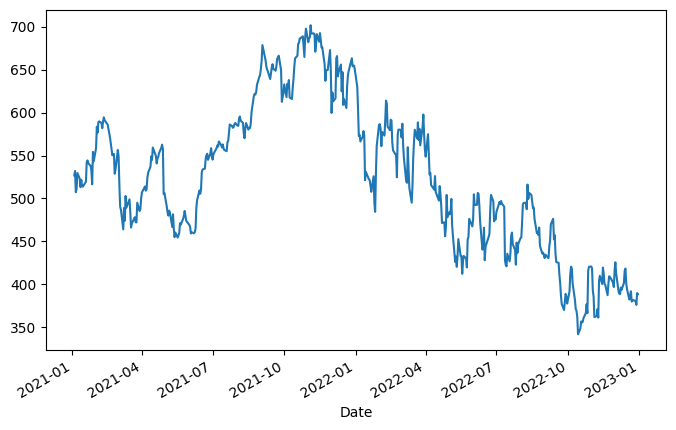

In [ ]:
df['Close'].plot(label = 'ServiceNow', figsize=(8,5))

# ServiceNow Competitors

* Zendesk
* Oracle 
* Atlassian
* Salesforce
* Workday

# Visualizing the returns of NOW and it's competitors

In [ ]:
# The tech stocks we'll be using are :
tech_list = ['NOW', 'ORCL', 'CRM', "TEAM"]

start = '2021-01-01'
end = '2023-01-01'

Now_df = yf.download('NOW', start=start, end=end) #interval='1mo')
Now_df['CompanyName'] = 'NOW'

Orcl_df = yf.download('ORCL', start=start, end=end) #interval='1mo')
Orcl_df['CompanyName'] = 'ORCL'

CRM_df = yf.download('CRM', start=start, end=end) #interval='1mo')
CRM_df['CompanyName'] = 'CRM'

Team_df = yf.download('Team', start=start, end=end) #interval='1mo')
Team_df['CompanyName'] = 'TEAM'


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.concat([Now_df, CRM_df, Orcl_df, Team_df])
    
df.tail()

,Open,High,Low,Close,Adj Close,Volume,CompanyName
Date,,,,,,,
2022-12-23,125.260002,127.449997,122.209999,127.220001,127.220001,2282200,TEAM
2022-12-27,125.250000,126.449997,122.160004,124.830002,124.830002,1579400,TEAM
2022-12-28,124.830002,126.489998,121.199997,123.300003,123.300003,1333600,TEAM
2022-12-29,125.180000,130.229996,124.099998,129.679993,129.679993,1653800,TEAM
2022-12-30,127.150002,129.669998,126.230003,128.679993,128.679993,1419900,TEAM


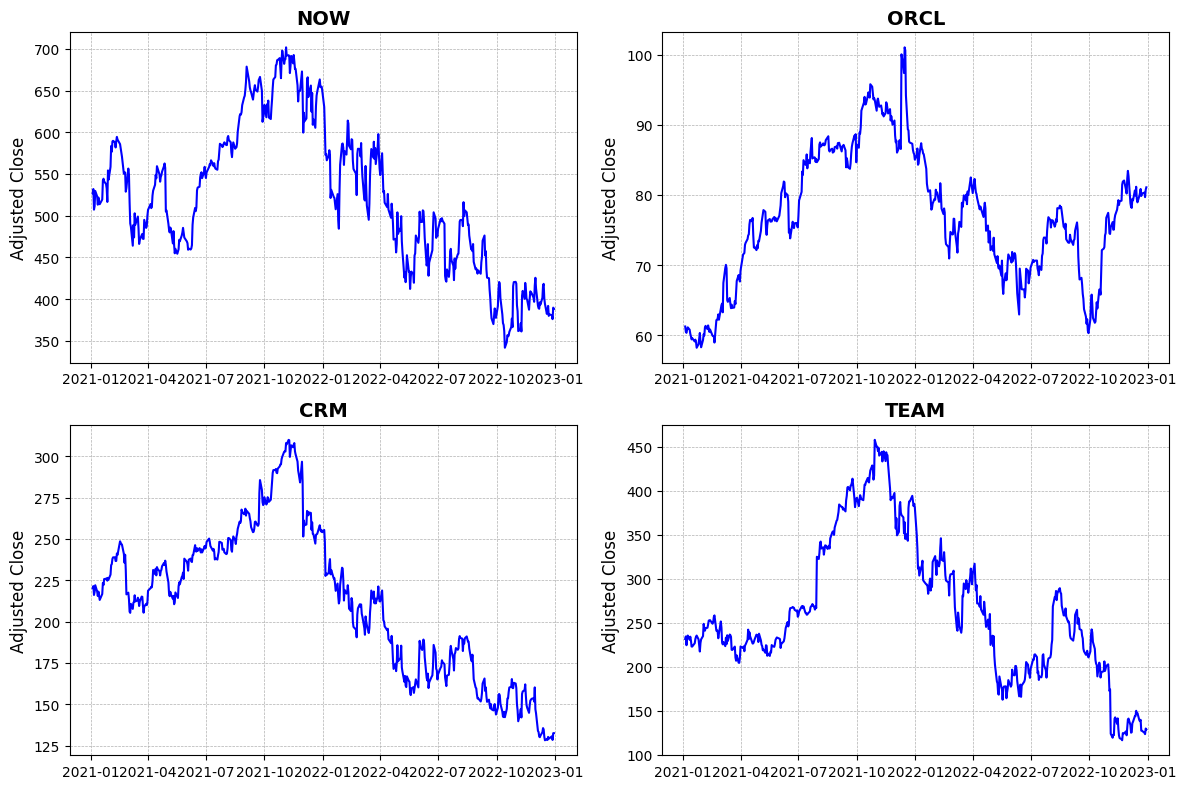

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, x in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df[df['CompanyName'] == x], x='Date', y='Adj Close', color='b')
    plt.title(f"{tech_list[i - 1]}", fontsize=14, fontweight='bold')
    plt.xlabel(None)
    plt.ylabel('Adjusted Close', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Moving Average

In [ ]:
#Moving Average
ma_day = [10, 20, 50]

#Setting up the moving averages data for all the stocks

Now_df['MA for 10 days'] = Now_df['Adj Close'].rolling(10).mean()
Now_df['MA for 20 days'] = Now_df['Adj Close'].rolling(20).mean()
Now_df['MA for 50 days'] = Now_df['Adj Close'].rolling(50).mean()

CRM_df['MA for 10 days'] = CRM_df['Adj Close'].rolling(10).mean()
CRM_df['MA for 20 days'] = CRM_df['Adj Close'].rolling(20).mean()
CRM_df['MA for 50 days'] = CRM_df['Adj Close'].rolling(50).mean()


Team_df['MA for 10 days'] = Team_df['Adj Close'].rolling(10).mean()
Team_df['MA for 20 days'] = Team_df['Adj Close'].rolling(20).mean()
Team_df['MA for 50 days'] = Team_df['Adj Close'].rolling(50).mean()

Orcl_df['MA for 10 days'] = Orcl_df['Adj Close'].rolling(10).mean()
Orcl_df['MA for 20 days'] = Orcl_df['Adj Close'].rolling(20).mean()
Orcl_df['MA for 50 days'] = Orcl_df['Adj Close'].rolling(50).mean()


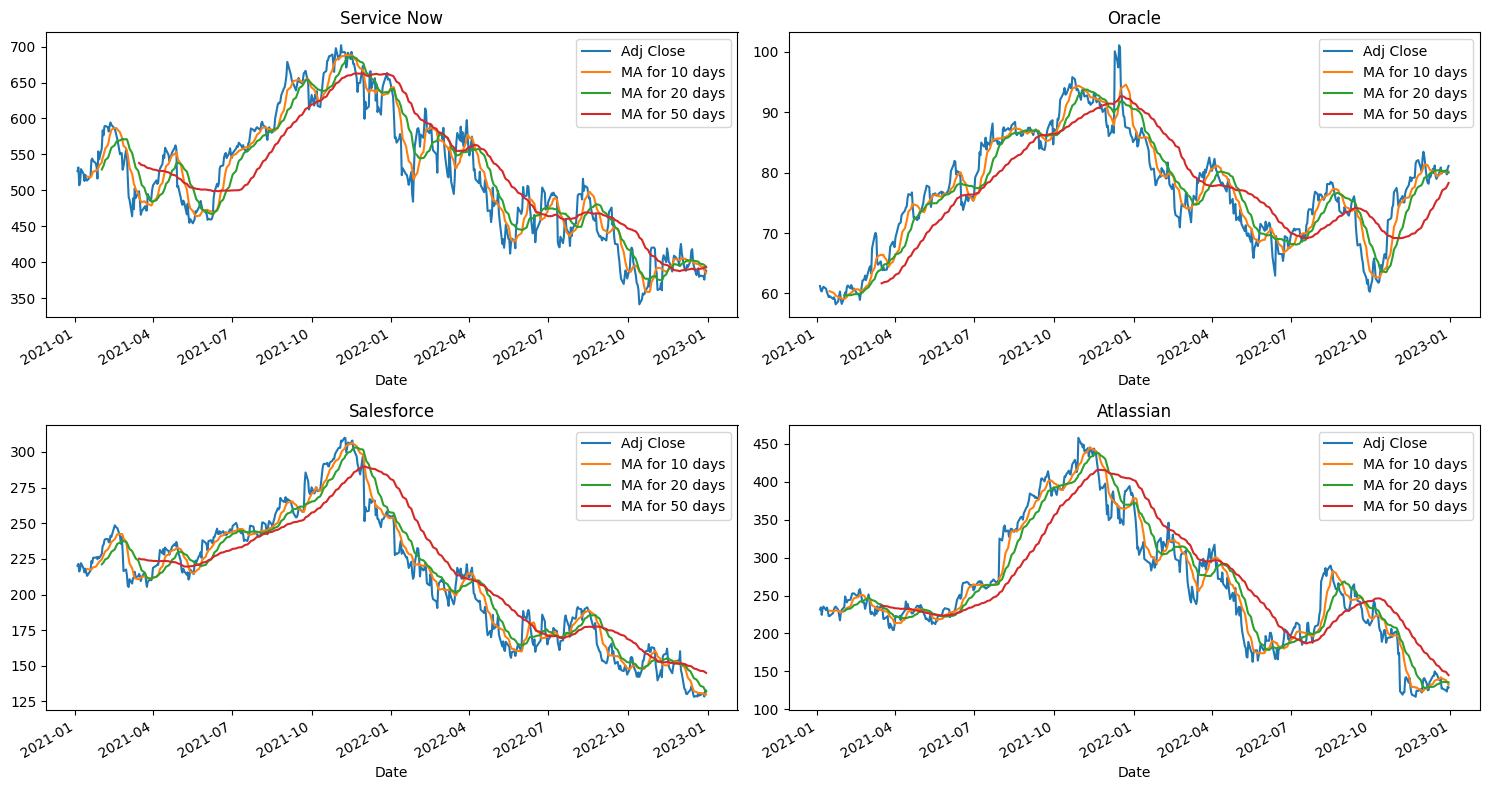

In [ ]:
#Plotting the data


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

Now_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Service Now')

Orcl_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Oracle')

CRM_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Salesforce')

Team_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Atlassian')


fig.tight_layout()

# Heatmap

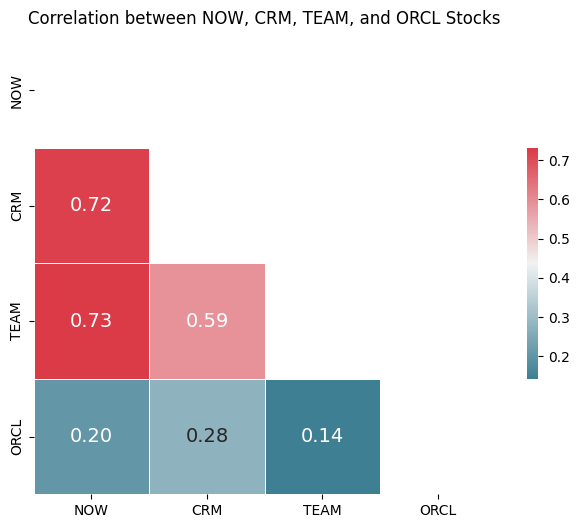

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the start and end dates for the analysis
start_date = '2021-01-01'
end_date = '2023-01-01'

# Load the stock prices data for NOW, CRM, TEAM, and ORCL from Yahoo Finance using Pandas DataReader
symbols = ['NOW', 'CRM', 'TEAM', 'ORCL']
data = pd.DataFrame()
for symbol in symbols:
    df = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1=1577836800&period2=1650422400&interval=1d&events=history&includeAdjustedClose=true')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df['Close'].loc[start_date:end_date].pct_change().dropna()
    data[symbol] = df

# Compute the correlation matrix between the daily stock returns
corr = data.corr()

# Create the heatmap using Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, annot_kws={'fontsize': 14}, fmt='.2f', linewidths=.5, square=True, cbar_kws={"shrink": .5}, ax=ax)
ax.set_title('Correlation between NOW, CRM, TEAM, and ORCL Stocks')
plt.show()


The resulting heat map shows the correlation between the adjusted closing prices of the four stocks, where red represents positive correlation, blue represents negative correlation, and white represents no correlation.

# Box plot

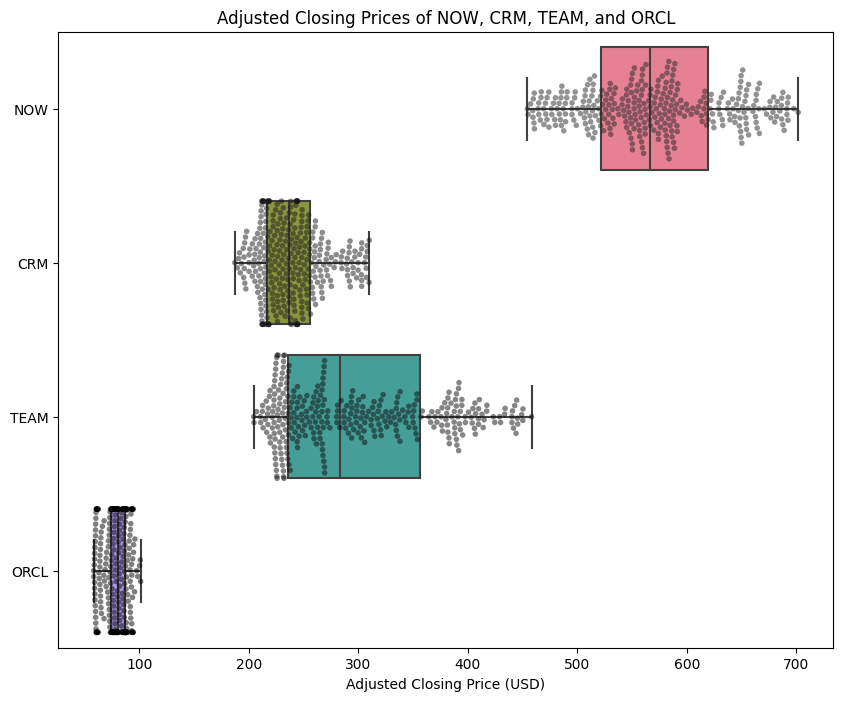

In [ ]:
# Load the adjusted closing prices data for NOW, CRM, TEAM, and ORCL from Yahoo Finance using Pandas DataReader
symbols = ['NOW', 'CRM', 'TEAM', 'ORCL']
data = pd.DataFrame()
for symbol in symbols:
    df = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1=1577836800&period2=1650422400&interval=1d&events=history&includeAdjustedClose=true')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df['Adj Close'].loc[start_date:end_date]
    data[symbol] = df

# Create the fancy box plot using Seaborn and Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, orient='h', palette='husl', ax=ax)
sns.swarmplot(data=data, orient='h', color='black', size=4, alpha=0.5, ax=ax)
ax.set_title('Adjusted Closing Prices of NOW, CRM, TEAM, and ORCL')
ax.set_xlabel('Adjusted Closing Price (USD)')
plt.show()


The resulting box plot shows the distribution of the adjusted closing prices for each stock, where the boxes represent the interquartile range, the whiskers represent the range of the data, and the points represent the individual data points.






# Volume Comparison

In [ ]:
start = '2021-01-01'
end = '2023-01-01'

NOW = yf.download("NOW", start=start, end=end)

# Download data for ORCL stock
ORCL = yf.download("ORCL", start=start, end=end)

# Download data for CRM stock
CRM = yf.download("CRM", start=start, end=end)

# Download data for TEAM stock
TEAM = yf.download("TEAM", start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
NOW['stock'] = 'NOW'
CRM['stock'] = 'CRM'
TEAM['stock'] = 'TEAM'
ORCL['stock'] = 'ORCL'

In [ ]:
df4 = NOW
df4 = df4.append(ORCL)
df4 = df4.append(TEAM)
df4 = df4.append(CRM)
df4 = df4.reset_index().rename(columns={'index': 'Date'})

In [ ]:
df4.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock
0,2021-01-04,556.940002,557.359985,521.510010,526.830017,526.830017,1889200,NOW
1,2021-01-05,526.039978,533.330017,524.799988,531.969971,531.969971,1544200,NOW
2,2021-01-06,519.770020,520.940002,507.059998,507.250000,507.250000,1969800,NOW
3,2021-01-07,510.000000,516.900024,508.709991,511.410004,511.410004,1869600,NOW
4,2021-01-08,521.640015,531.609985,518.159973,529.640015,529.640015,1594900,NOW


In [ ]:
df4['Date'] = pd.to_datetime(df4['Date'])

In [ ]:
df4['Open-Close'] = df4['Open'] - df4['Close']
df4

,Date,Open,High,Low,Close,Adj Close,Volume,stock,Open-Close
0,2021-01-04,556.940002,557.359985,521.510010,526.830017,526.830017,1889200,NOW,30.109985
1,2021-01-05,526.039978,533.330017,524.799988,531.969971,531.969971,1544200,NOW,-5.929993
2,2021-01-06,519.770020,520.940002,507.059998,507.250000,507.250000,1969800,NOW,12.520020
3,2021-01-07,510.000000,516.900024,508.709991,511.410004,511.410004,1869600,NOW,-1.410004
4,2021-01-08,521.640015,531.609985,518.159973,529.640015,529.640015,1594900,NOW,-8.000000
...,...,...,...,...,...,...,...,...,...
2007,2022-12-23,128.729996,129.860001,127.589996,129.440002,129.440002,5821300,CRM,-0.710007
2008,2022-12-27,128.559998,131.750000,127.650002,130.660004,130.660004,8300800,CRM,-2.100006
2009,2022-12-28,129.710007,131.139999,128.169998,128.470001,128.470001,6249800,CRM,1.240005
2010,2022-12-29,129.699997,132.949997,129.500000,132.539993,132.539993,7628800,CRM,-2.839996


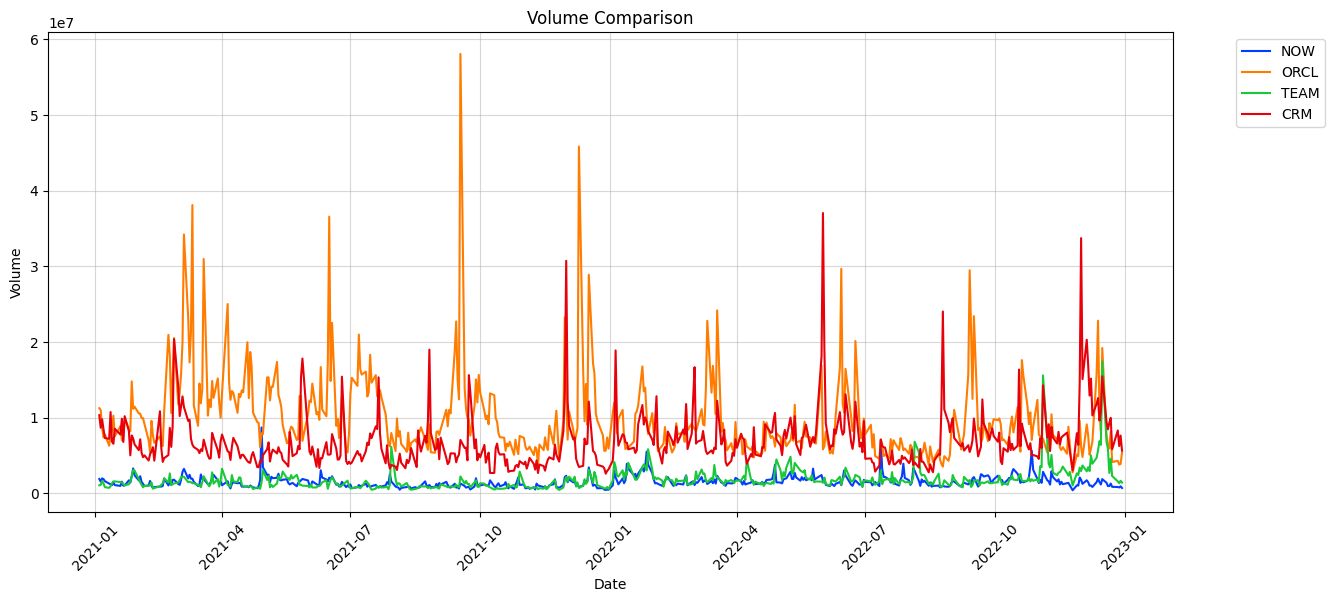

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6)) 

# create the plot
v1 = sns.lineplot(data=df4, x='Date', y='Volume', hue='stock', palette='bright')
v1.set_title('Volume Comparison')

# add grid lines
plt.grid(True, alpha=0.5)

# add legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# rotate x-axis tick labels
plt.xticks(rotation=45)

# add labels to x-axis and y-axis
plt.xlabel('Date')
plt.ylabel('Volume')

# adjust the spacing
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.85, hspace=0.5, wspace=0.5)

# save the plot as a PNG file
plt.savefig('vline_fancy.png', bbox_inches='tight')


# Open-Close Price Comparison

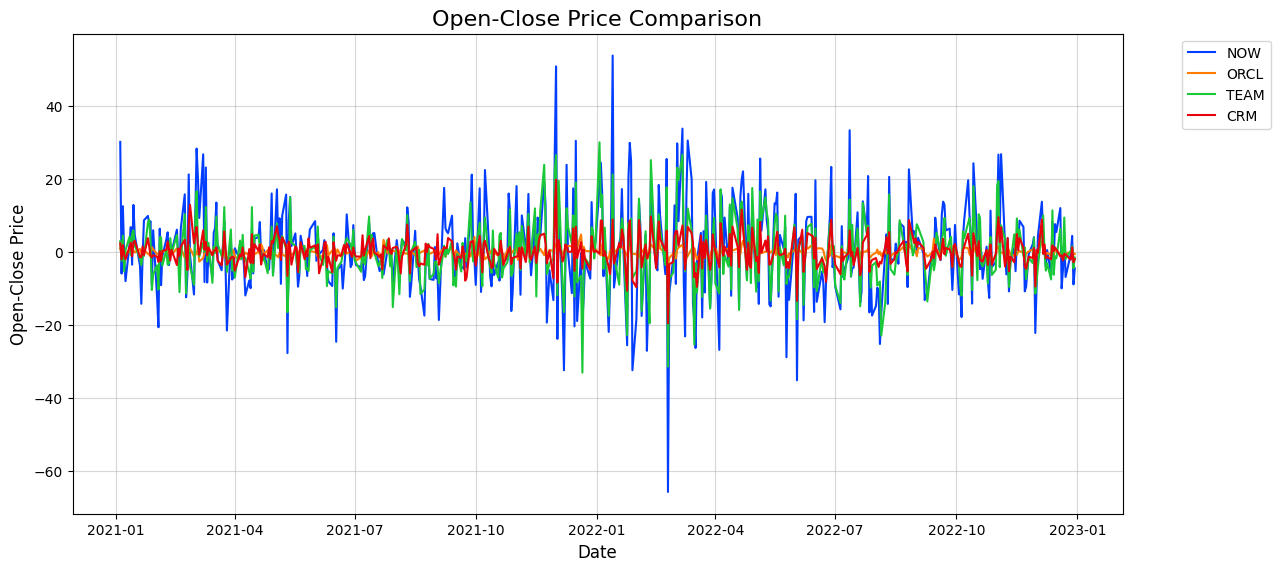

In [ ]:
# set the plot size
plt.figure(figsize=(15,6)) 

# create the plot
ocl = sns.lineplot(data=df4, x='Date', y='Open-Close', hue='stock', palette='bright')

# set plot title and labels
plt.title('Open-Close Price Comparison', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Open-Close Price', fontsize=12)

# add legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# add grid lines
plt.grid(True, alpha=0.5)

# adjust the spacing
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.8, hspace=0.5, wspace=0.5)

# save the plot
plt.savefig("o-c_line_fancy.png")


# Percentage Change

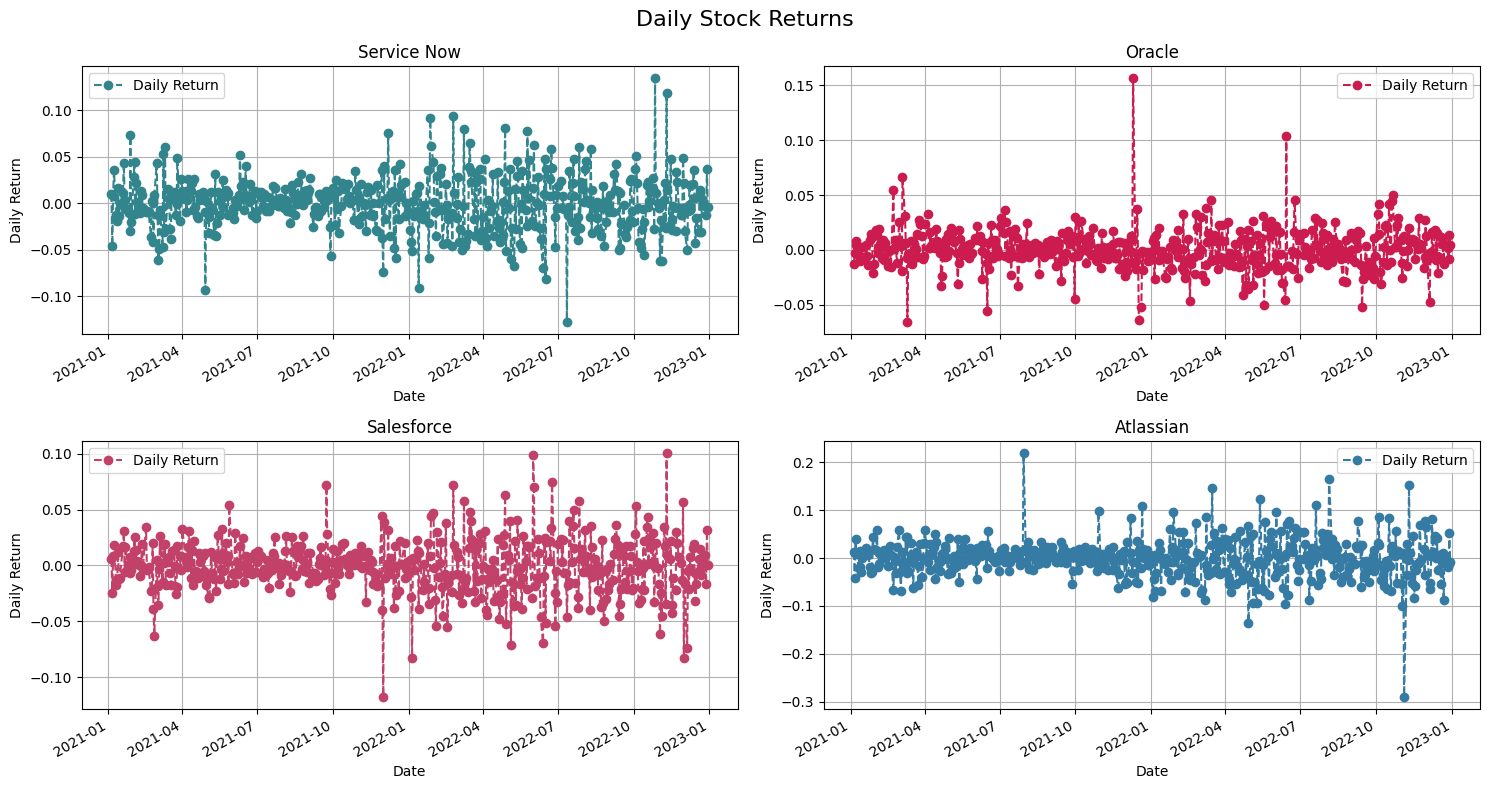

In [ ]:
# Set custom color palettes for each subplot
now_palette = sns.color_palette("crest", as_cmap=True)
orcl_palette = sns.color_palette("rocket", as_cmap=True)
crm_palette = sns.color_palette("flare", as_cmap=True)
team_palette = sns.color_palette("mako", as_cmap=True)

# Calculate daily returns
Now_df['Daily Return'] = Now_df['Adj Close'].pct_change()
Orcl_df['Daily Return'] = Orcl_df['Adj Close'].pct_change()
CRM_df['Daily Return'] = CRM_df['Adj Close'].pct_change()
Team_df['Daily Return'] = Team_df['Adj Close'].pct_change()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Add titles and set custom color palettes for each subplot
now_plot = Now_df['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o', title='Service Now', color=now_palette(0.5))
orcl_plot = Orcl_df['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o', title='Oracle', color=orcl_palette(0.5))
crm_plot = CRM_df['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o', title='Salesforce', color=crm_palette(0.5))
team_plot = Team_df['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o', title='Atlassian', color=team_palette(0.5))

# Set y-axis label for all subplots
for ax in axes.flat:
    ax.set(ylabel='Daily Return')

# Add main title for the figure
fig.suptitle('Daily Stock Returns', fontsize=16)

# Add grid lines to all subplots
for ax in axes.flat:
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()


In [ ]:
df4.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,stock,Open-Close
1751,2021-12-17,251.240005,253.899994,246.789993,252.929993,252.929993,12119400,CRM,-1.689987
123,2021-06-30,556.890015,557.960022,547.609985,549.549988,549.549988,842300,NOW,7.340027
1174,2021-09-02,371.880005,376.359985,370.480988,376.000000,376.000000,623300,TEAM,-4.119995
898,2022-07-29,77.010002,78.160004,77.000000,77.839996,76.830872,5926600,ORCL,-0.829994
296,2022-03-08,510.000000,535.900024,504.459991,518.200012,518.200012,1479500,NOW,-8.200012
1869,2022-06-08,187.000000,190.559998,185.389999,189.190002,189.190002,6226200,CRM,-2.190002
1993,2022-12-05,142.800003,144.389999,132.880005,133.929993,133.929993,20294600,CRM,8.870010
1886,2022-07-05,166.100006,172.350006,164.610001,172.199997,172.199997,4614200,CRM,-6.099991
1328,2022-04-13,270.040009,282.369995,266.329987,280.329987,280.329987,1121000,TEAM,-10.289978
1782,2022-02-02,233.740005,234.490005,223.020004,225.009995,225.009995,9378900,CRM,8.730011


In [ ]:
Now_df.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,494.000000,484.000000,454.000000,502.000000
mean,522.596701,531.217653,513.306441,522.107694,522.107694,1.520080e+06,523.372061,524.685630,527.899682,-0.000177
std,87.039846,86.917651,86.729500,87.180913,87.180913,7.965260e+05,84.999287,83.152235,78.793568,0.029408
min,347.750000,358.880005,337.000000,341.760010,341.760010,4.014000e+05,358.842001,375.101501,387.888000,-0.127365
25%,459.729996,465.244995,450.425003,458.084991,458.084991,1.001500e+06,464.865998,466.303251,467.017300,-0.015961
50%,520.000000,528.820007,508.709991,515.599976,515.599976,1.359900e+06,524.624504,527.919000,521.703799,0.000197
75%,583.910004,590.735016,574.470001,583.429993,583.429993,1.833200e+06,583.489502,576.390877,589.421652,0.014688
max,702.000000,707.599976,689.150024,701.729980,701.729980,8.692900e+06,688.990002,686.195505,662.727999,0.134440


# Kernel Density Estimation

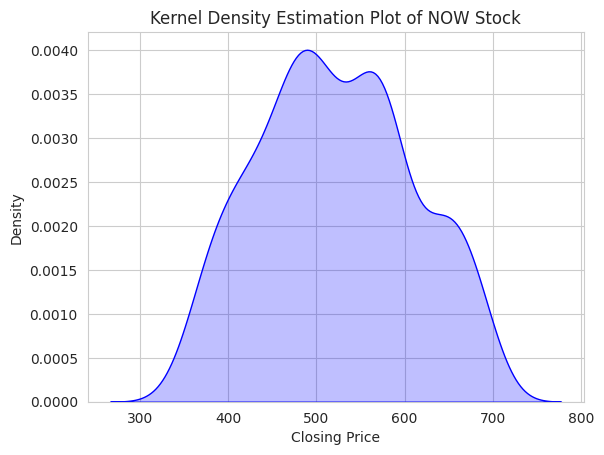

In [ ]:
df = Now_df

# Create the KDE plot using seaborn
sns.set_style('whitegrid')
sns.kdeplot(df['Close'], shade=True, color='blue')

# Set the plot labels and title
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot of NOW Stock')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Kernel Density Estimation Plot of NOW Stock')

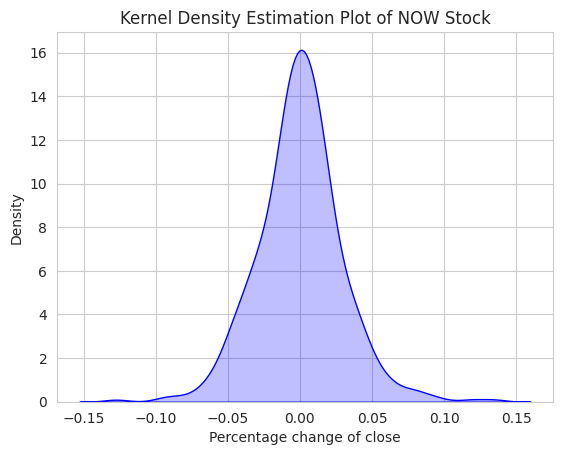

In [ ]:
# Create the KDE plot using seaborn
sns.set_style('whitegrid')
sns.kdeplot(df['Close'].pct_change(1), shade=True, color='blue')

# Set the plot labels and title
plt.xlabel('Percentage change of close')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot of NOW Stock')